Question 1


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
# Step 1: Load dataset
df = pd.read_csv("Titanic-Dataset.csv")

# Step 2: Show structure and summary
print("== Dataset Info ==")
df.info()
print("\n== Statistical Summary ==")
print(df.describe())

== Dataset Info ==
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

== Statistical Summary ==
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    

The code loads the Titanic dataset and displays its structure and summary. `df.info()` shows there are 891 entries, with some missing values in columns like `Age` and `Cabin`. `df.describe()` provides statistics such as average age (~29.7), average fare (~32.2), and survival rate (~38%). It also reveals most passengers traveled alone, helping to understand the dataset’s basic characteristics.

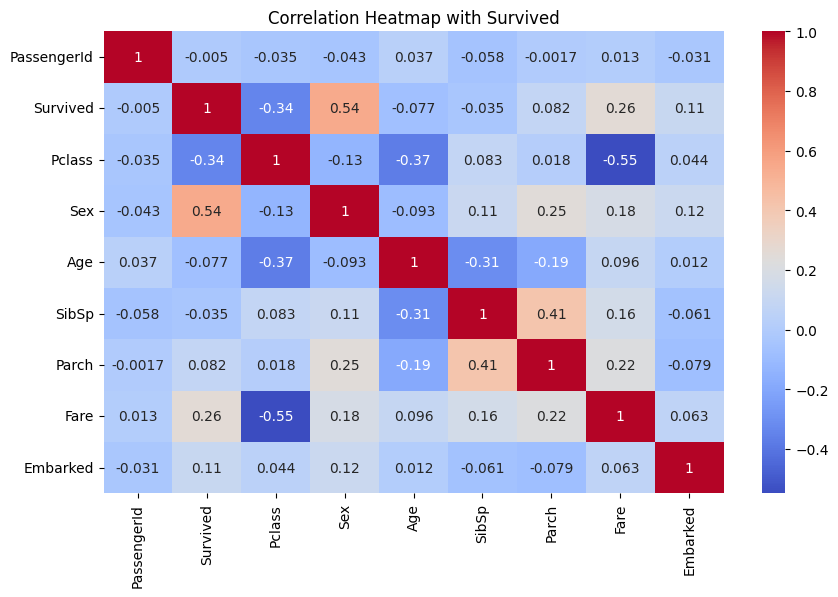

In [ ]:
#Step 3: Encode categorical variables using .loc[]
df_encoded = df.copy()
df_encoded.loc[df_encoded['Sex'] == 'male', 'Sex'] = 0
df_encoded.loc[df_encoded['Sex'] == 'female', 'Sex'] = 1
df_encoded.loc[df_encoded['Embarked'] == 'S', 'Embarked'] = 0
df_encoded.loc[df_encoded['Embarked'] == 'C', 'Embarked'] = 1
df_encoded.loc[df_encoded['Embarked'] == 'Q', 'Embarked'] = 2

# Step 4: Drop non-numeric columns before correlation
df_corr = df_encoded.drop(columns=['Name', 'Ticket', 'Cabin'])
df_corr['Sex'] = df_corr['Sex'].astype(float)
df_corr['Embarked'] = df_corr['Embarked'].astype(float)

# Step 5: Plot correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap with Survived")
plt.show()


This code encodes categorical columns (`Sex` and `Embarked`) into numeric values using `.loc[]`, making them suitable for correlation analysis. It then drops non-numeric columns (`Name`, `Ticket`, `Cabin`) and ensures the encoded columns are float type. Finally, it plots a heatmap showing correlations between features and the target (`Survived`), helping identify which variables are most related to survival.

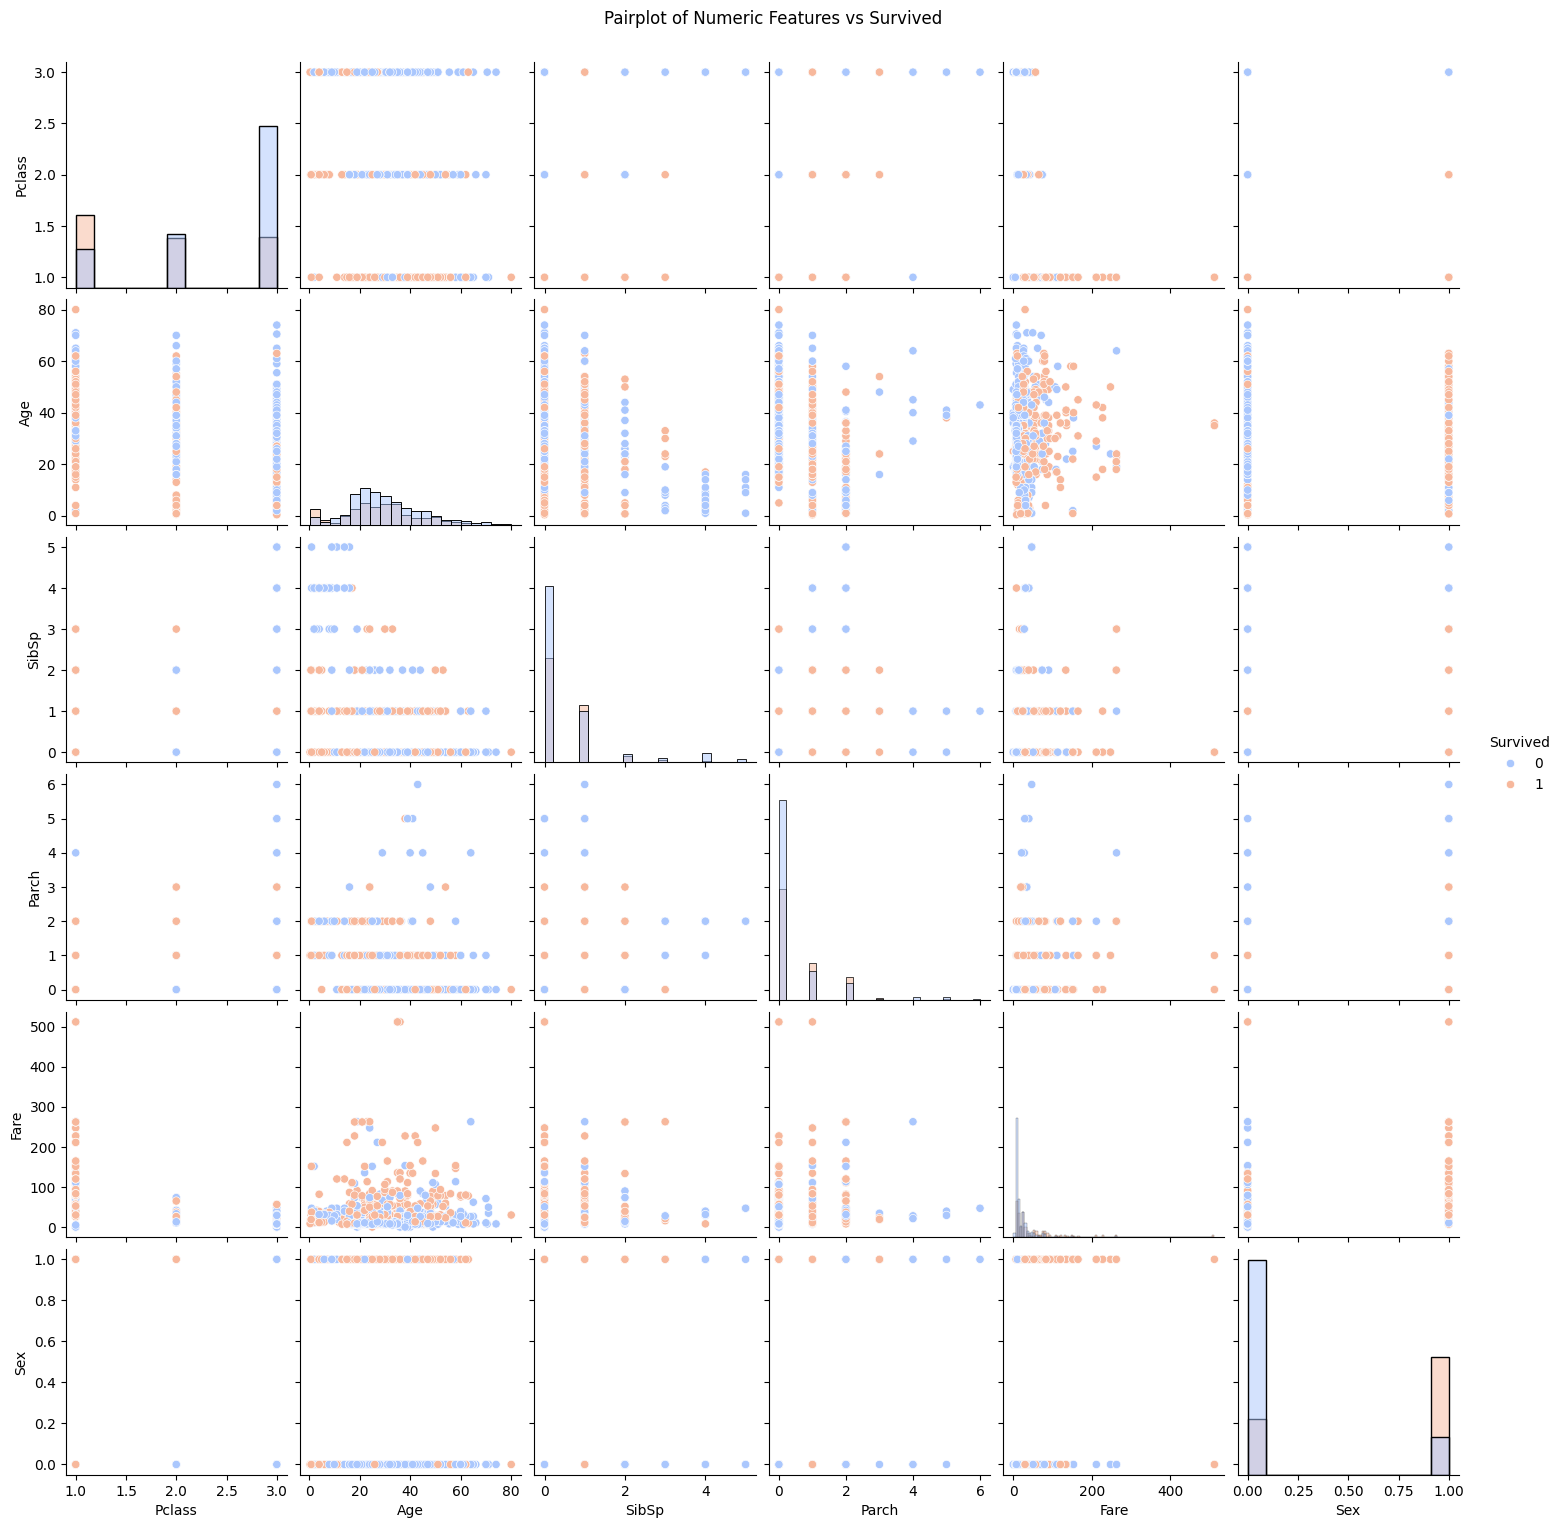

In [ ]:
# Step 6: Pairplot (scatter + hist) for numeric features
plot_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex']
df_plot = df_encoded[plot_cols].dropna()
sns.pairplot(df_plot, hue='Survived', diag_kind='hist', palette='coolwarm')
plt.suptitle('Pairplot of Numeric Features vs Survived', y=1.02)
plt.show()


This code creates a pairplot using Seaborn to visualize relationships between numeric features (`Survived`, `Pclass`, `Age`, etc.). It filters out rows with missing values, then plots scatter plots for feature pairs and histograms on the diagonals. The points are colored by survival status (`Survived`), helping reveal patterns and potential correlations between features and survival.

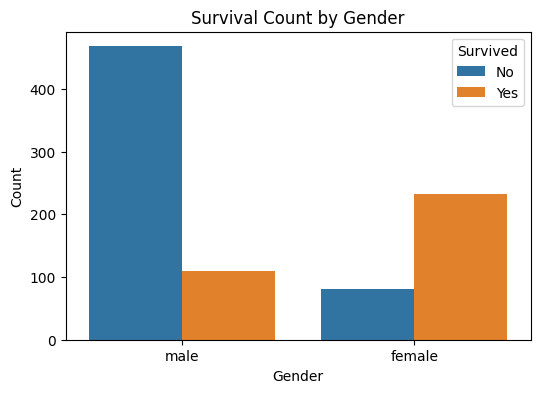

In [ ]:
# Step 7: Plotly Scatter Plot (Age vs Fare colored by Survival)
df_scatter = df[['Age', 'Fare', 'Survived']].dropna()
fig = px.scatter(
    df_scatter,
    x='Age',
    y='Fare',
    color='Survived',
    title='Survival by Age and Fare',
    labels={'Survived': 'Survived (0 = No, 1 = Yes)'},
    color_continuous_scale='Bluered'
)
fig.show()

# Step 8: Seaborn Countplot (Survival by Gender)
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


This section includes two visualizations. In Step 7, a Plotly scatter plot shows the relationship between Age and Fare, with points colored by survival status. This helps visualize how fare and age influenced survival. Step 8 uses a Seaborn countplot to display the number of survivors and non-survivors by gender, clearly showing that females had a higher survival rate than males. Together, these plots highlight key survival patterns in the dataset.

<ipython-input-8-6df91a8fa9bd>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




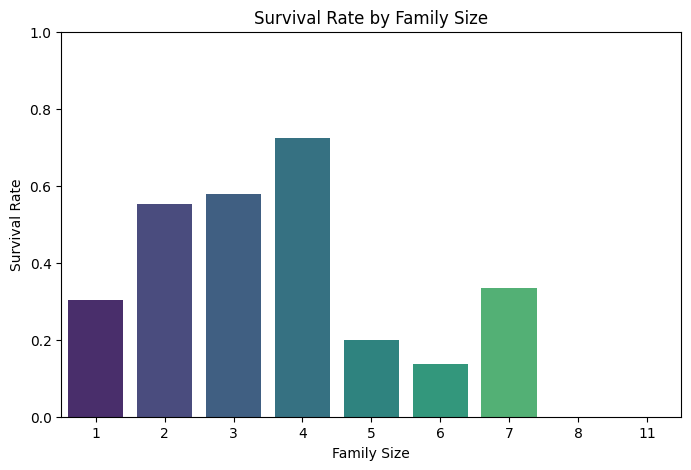

In [ ]:
# Add 'FamilySize' column
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # +1 to include the person

# Group by family size and compute survival rate
family_survival = df.groupby('FamilySize')['Survived'].mean().reset_index()

# Plot survival rate by family size
plt.figure(figsize=(8, 5))
sns.barplot(data=family_survival, x='FamilySize', y='Survived', palette='viridis')
plt.title("Survival Rate by Family Size")
plt.xlabel("Family Size")
plt.ylabel("Survival Rate")
plt.ylim(0, 1)
plt.show()

This code adds a new column called 'FamilySize' to the dataset, which represents the total family size of a passenger, including the individual themselves. The family size is calculated by summing the number of siblings/spouses ('SibSp') and parents/children ('Parch'), then adding 1 to include the person. The dataset is then grouped by 'FamilySize', and the mean survival rate for each group is calculated. Finally, a bar plot is generated to visually display the survival rate for each family size, with the x-axis representing family size and the y-axis showing the corresponding survival rate, using a color palette for better visualization.

<ipython-input-9-79cdfb6c8115>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




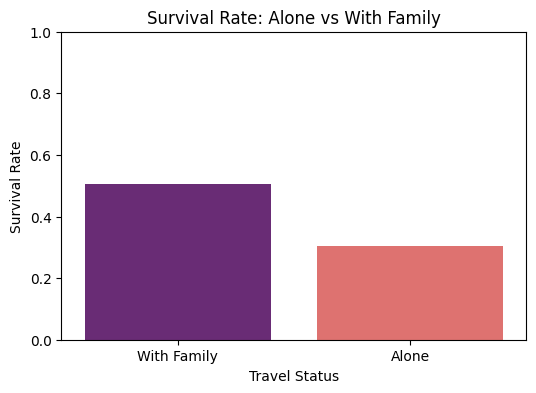

In [ ]:
df['Alone'] = df['FamilySize'].apply(lambda x: 1 if x == 1 else 0)

# Group by Alone status and calculate survival rate
alone_survival = df.groupby('Alone')['Survived'].mean().reset_index()
alone_survival['Alone'] = alone_survival['Alone'].map({1: 'Alone', 0: 'With Family'})

# Plot survival rate by Alone status
plt.figure(figsize=(6, 4))
sns.barplot(data=alone_survival, x='Alone', y='Survived', palette='magma')
plt.title("Survival Rate: Alone vs With Family")
plt.xlabel("Travel Status")
plt.ylabel("Survival Rate")
plt.ylim(0, 1)
plt.show()

This code creates an 'Alone' column to indicate whether a passenger was traveling alone or with family based on family size. It then calculates the survival rate for each group and visualizes it in a bar plot, comparing the survival rates of passengers traveling alone versus with family.

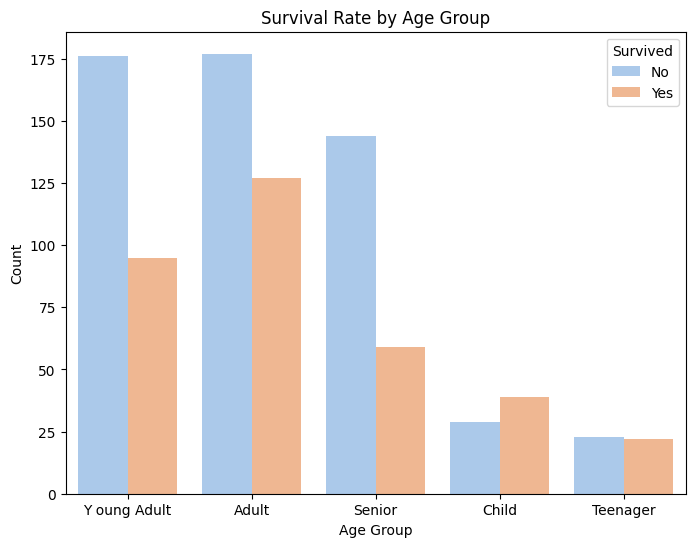

In [ ]:
# --- Age Group Categorization and Survival Analysis ---
def categorize_age(age):
    if age < 12:
        return 'Child'
    elif 12 <= age < 18:
        return 'Teenager'
    elif 18 <= age < 30:
        return 'Y oung Adult'
    elif 30 <= age < 60:
        return 'Adult'
    else:
        return 'Senior'

df_encoded['AgeGroup'] = df_encoded['Age'].apply(categorize_age)

plt.figure(figsize=(8, 6))
sns.countplot(data=df_encoded, x='AgeGroup', hue='Survived', palette='pastel')
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

This code categorizes passengers into age groups ('Child', 'Teenager', 'Young Adult', 'Adult', 'Senior') based on their age. It then creates a new column 'AgeGroup' in the dataset. A count plot is generated to visualize the distribution of passengers across age groups, with a breakdown of survival status, showing the count of survivors and non-survivors in each age group.